In [66]:
import audio_lib as audio
import matplotlib.pyplot as p
import numpy as np
import tensorflow as tf

In [2]:
sess = tf.compat.v1.InteractiveSession()

In [111]:
#setting
window_len = 480
window_stride = 240
fft_len = 512

wav_ = tf.placeholder(dtype=tf.float32, shape=[None, None])
stft_ = tf.contrib.signal.stft(wav_,
                              frame_length = window_len,
                              frame_step = window_stride,
                              fft_length = fft_len)
stft_ = stft_[:, :, :128]
stft_Am_ = tf.abs(stft_)


inverse_stft_ = tf.signal.inverse_stft(stft_,
                                      frame_length = window_len,
                                      frame_step = window_stride,
                                      fft_length = fft_len)

In [112]:
wav = np.zeros([1,1000,])
stft, stft_am, istft = sess.run([stft_, stft_Am_, inverse_stft_],
                               feed_dict={wav_: wav})
print(istft.shape)

(1, 960)


In [113]:
wav, par1 = audio.open_wave('test.wav')
# wav2, par2 = audio.open_wave('test.wav')
wav = wav.reshape([1,-1])
# wav2 = wav2.reshape([1,-1])
# wav = np.concatenate([wav1, wav2], axis=0)
# wav = wav / np.max(np.abs(wav))
stft, stft_am, istft = sess.run([stft_, stft_Am_, inverse_stft_],
                               feed_dict={wav_: wav})

In [102]:
stft_am.shape

(1, 303, 32)

476018.62 4139.0146


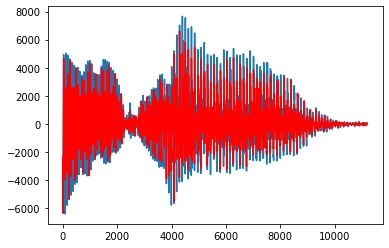

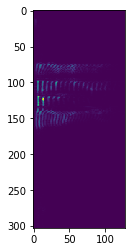

In [114]:
p.figure(1)
m = 30000
# p.plot(wav[0, m:m+200])
# p.plot(istft[0, m:m+200], 'r')

p.plot(wav[0, m:m+11200])
p.plot(istft[0, m:m+11200], 'r')
p.figure(2)
p.imshow(stft_am.reshape([303, 128]))
print(np.max(stft_am),np.mean(stft_am))

In [40]:
clean_wav_ = tf.constant([[1.,2.,3.], [2.,3.,4.]])
estimated_wav_ = tf.constant([[1.1,2.1,3.1], [21.,32.,4.1]])


# loss_ = tf.reduce_sum(clean_wav_*estimated_wav_, axis=-1)
# loss_ = tf.reshape(loss_, [2, 1])
# loss_ = loss_*clean_wav_
s_target = tf.reshape(tf.reduce_sum(clean_wav_*estimated_wav_, axis=-1), [-1,1])*clean_wav_
s_target = s_target/tf.reshape(tf.reduce_sum(tf.square(clean_wav_),axis=-1), [-1,1])
e_noise = estimated_wav_-clean_wav_

L1 = tf.reduce_sum(tf.square(s_target),axis=-1)
L2 = tf.reduce_sum(tf.square(e_noise),axis=-1)

loss_ = L1/L2
# loss_ = 10*tf.log(loss_)/tf.log(10.)
# loss_ = loss_

# loss = sess.run(loss_)
loss = sess.run(loss_)
print(loss)

[507.52426     0.6838935]


In [65]:
[0.001 * 0.9**i for i in range(20)]

[0.001,
 0.0009000000000000001,
 0.0008100000000000001,
 0.0007290000000000002,
 0.0006561000000000001,
 0.00059049,
 0.000531441,
 0.0004782969000000001,
 0.0004304672100000001,
 0.0003874204890000001,
 0.0003486784401000001,
 0.0003138105960900001,
 0.0002824295364810001,
 0.0002541865828329001,
 0.0002287679245496101,
 0.0002058911320946491,
 0.00018530201888518417,
 0.00016677181699666576,
 0.00015009463529699917,
 0.0001350851717672993]